In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Importing the necessary libraries

In [2]:
data=pd.read_csv('../../data/second/onlinefraud.csv')

Opening the file with the dataset

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Columns and their descriptions:

**step**: Represents a unit of time where 1 step equals 1 hour

**type**:Type of online transaction

**amount**: The amount of the transaction

**nameOrig**: Customer starting the transaction

**oldbalanceOrg**: Balance before the transaction

**newbalanceOrig**: Balance after the transaction

**nameDest**: Recipient of the transaction

**oldbalanceDest**: Initial balance of recipient before the transaction

**newbalanceDest**: The new balance of recipient after the transaction

**isFraud**: Is it a fraud transaction? (0 for no 1 for yes)

**isFlaggedFraud**: Was the transaction flagged as fraud? (0 for no 1 for yes)


In [5]:
data.shape #checking the shape of the dataframe

(6362620, 11)

In [6]:
data.info()   # seeing the types of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.duplicated().any()  #no duplicated rows

False

In [8]:
data.isnull().sum() #no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


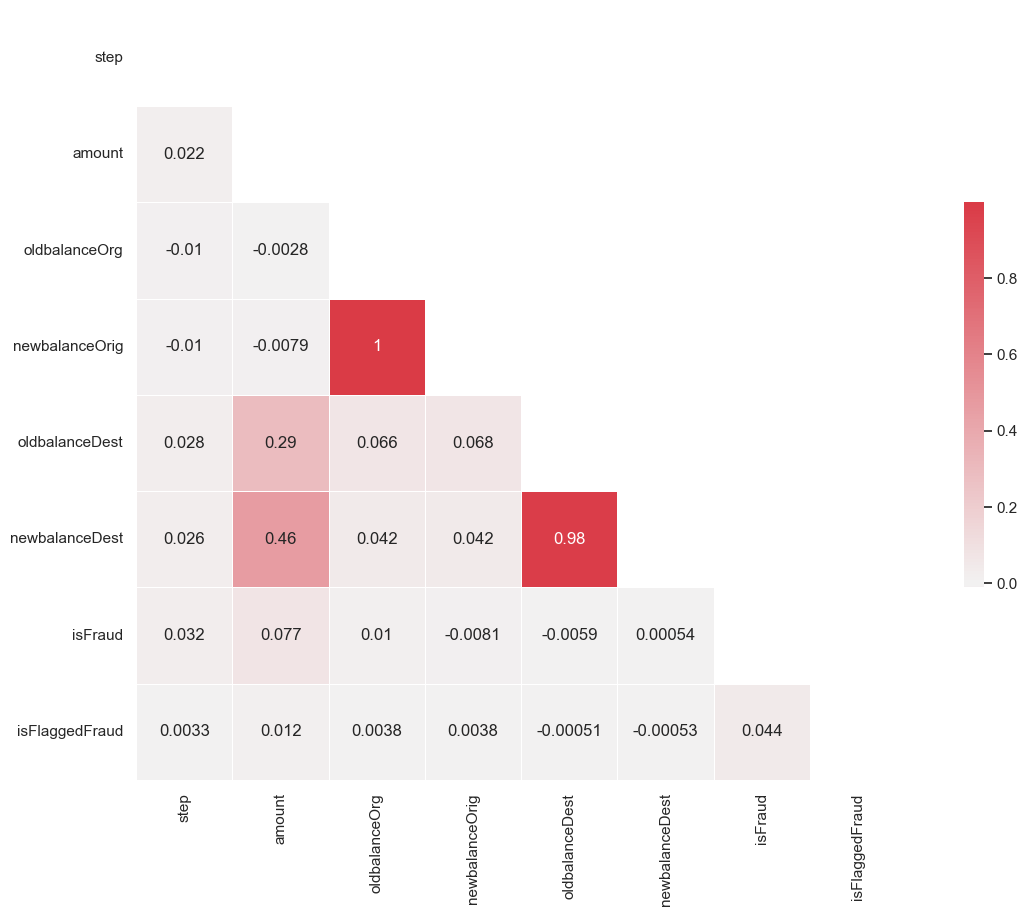

In [10]:
#Checking the correlations 

plt.figure(figsize=(15, 10))  

sns.set(style='white')    

mask=np.triu(np.ones_like(data.corr(), dtype=bool))    

cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(data.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

The target column is 'isFraud' so I need to check the correlations of the rest of the columns to that column. It seems that there are no high correlations at first sight. The highest is column 'amount' with 0.077, followed by 'step' with 0.032, then 'oldbalanceOrg' with 0.01, then 'newbalanceOrig' with -0,0081, followed by 'oldbalanceDest' with -0.0059 and lastly 'newbalanceDest' with 0.00054

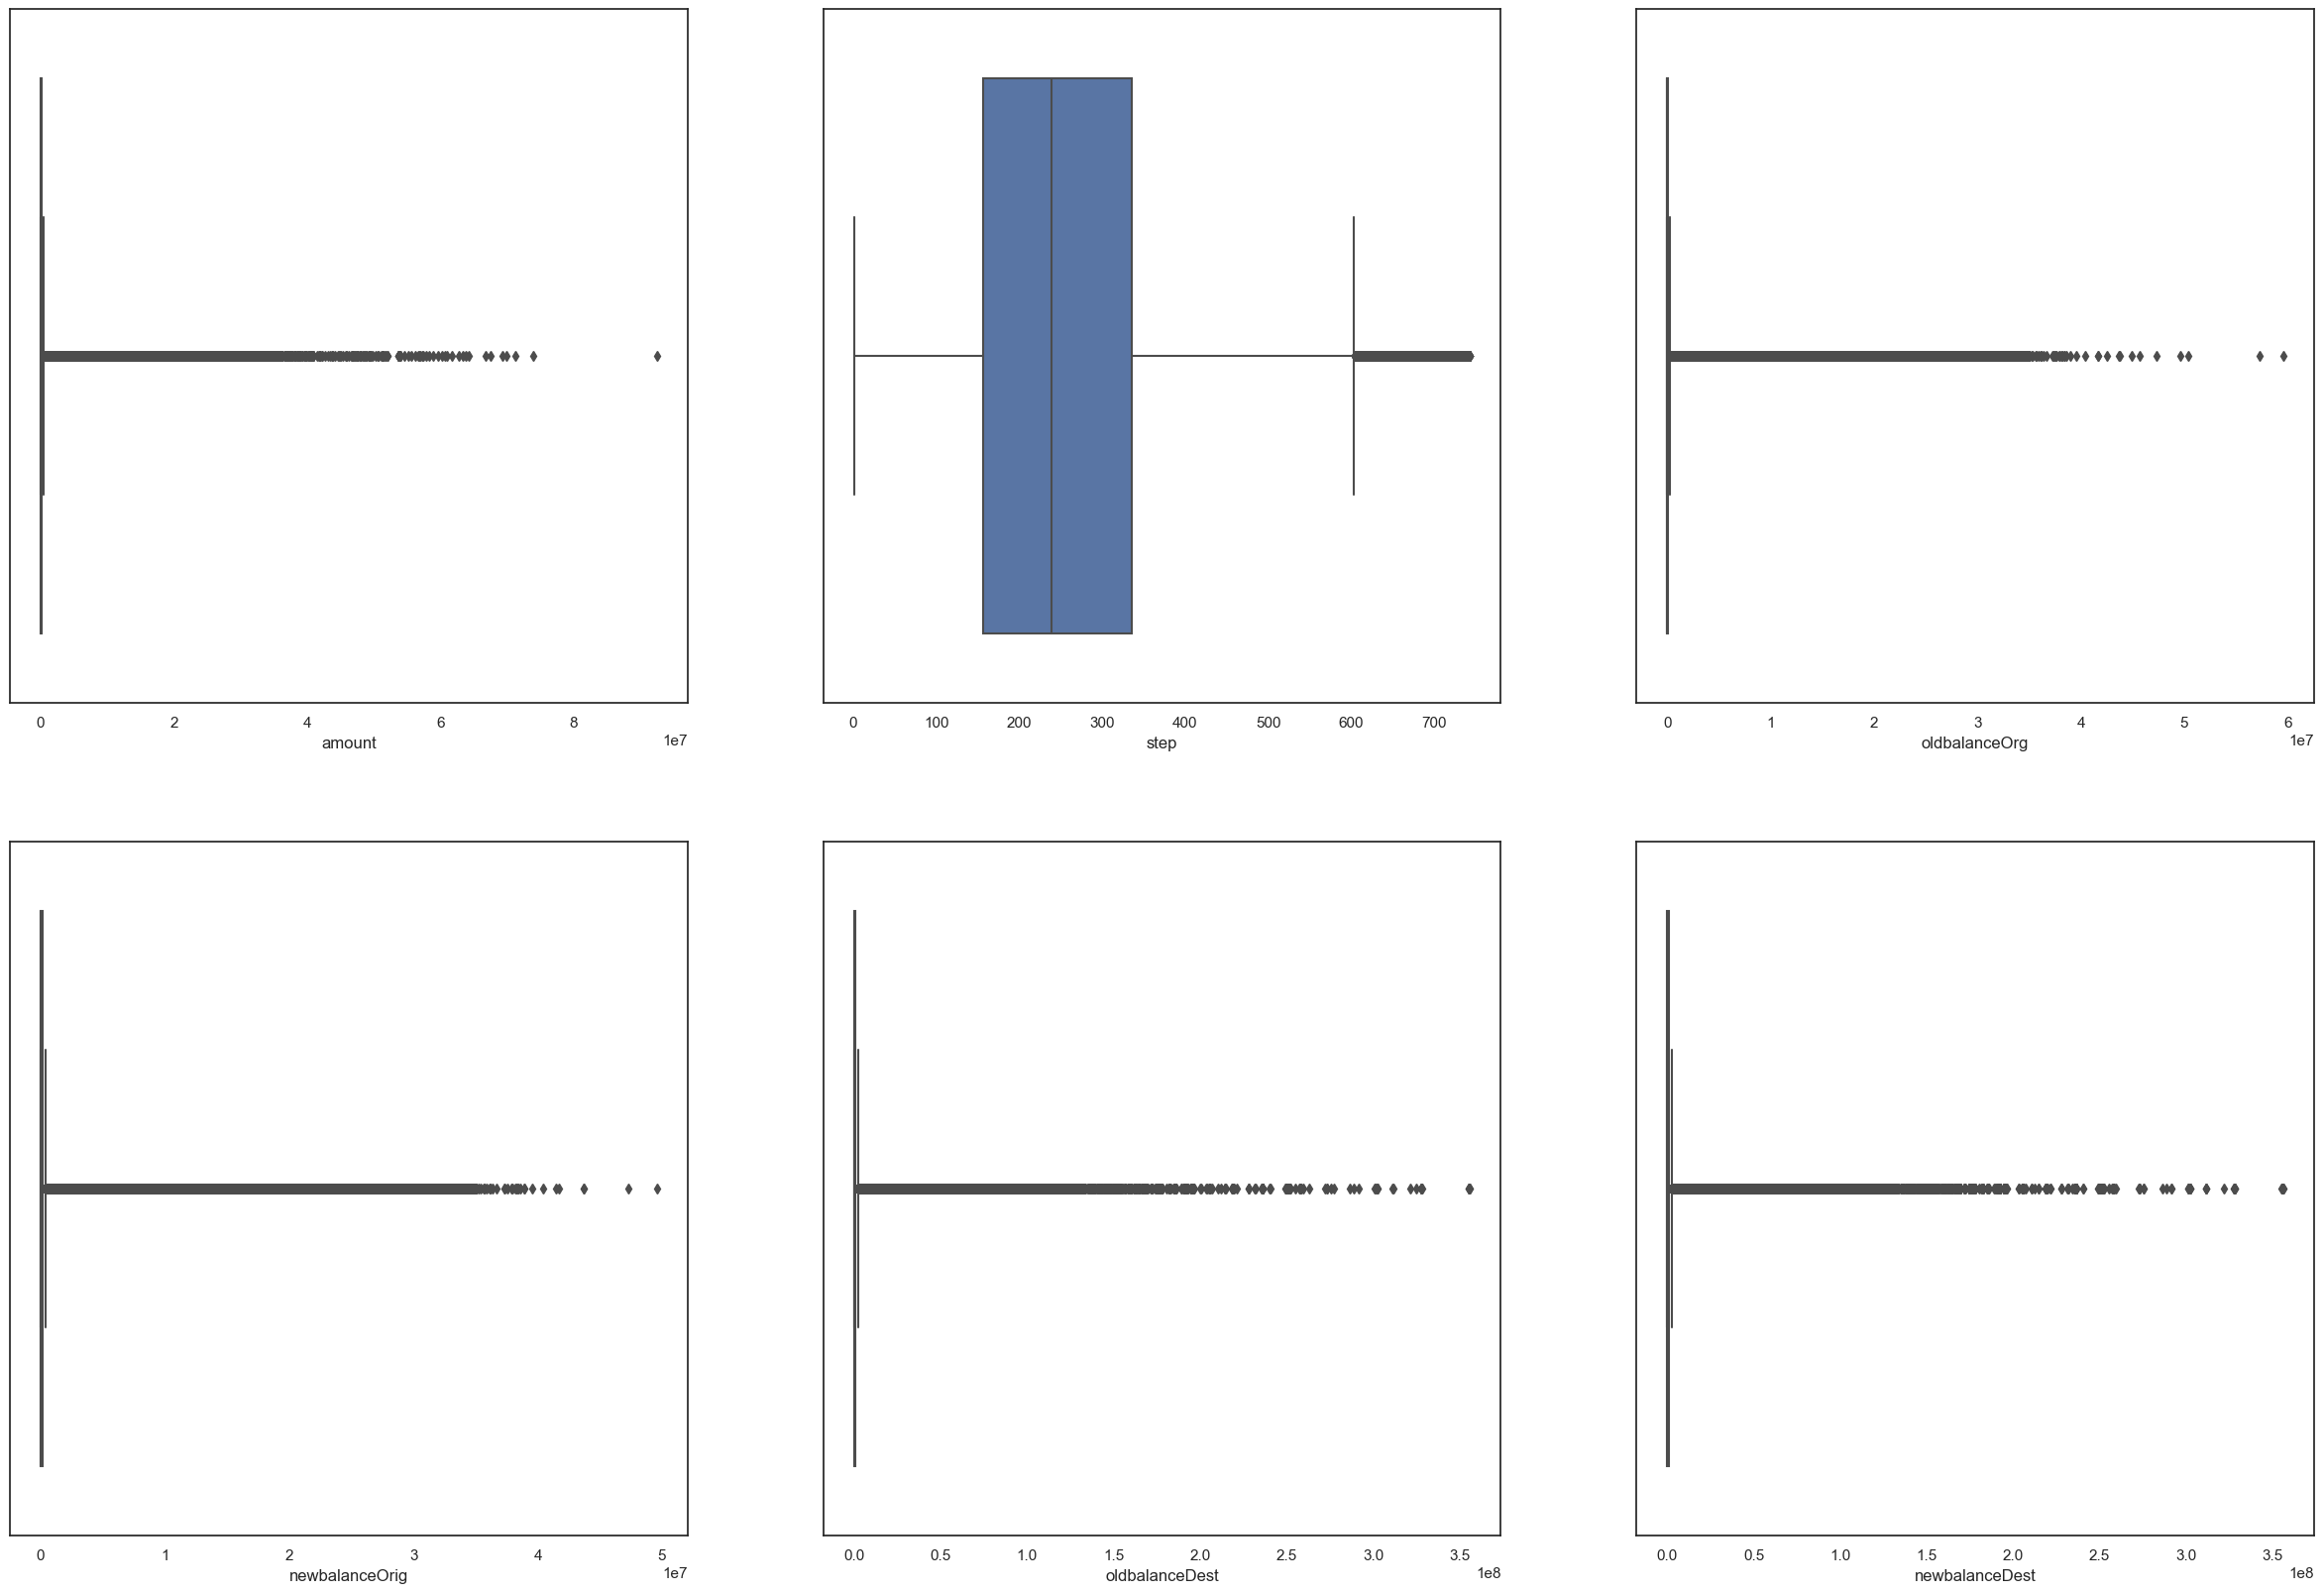

In [11]:
#checking the outliers
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
df = data[['amount', 'step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

ax = ax.flatten()

for i in range(len(df.columns)):
    sns.boxplot(x=df.columns[i], data=df, ax=ax[i])

plt.show()

Above are the boxplots for the outliers for the numerical non-binary columns. There are quite a few of them.

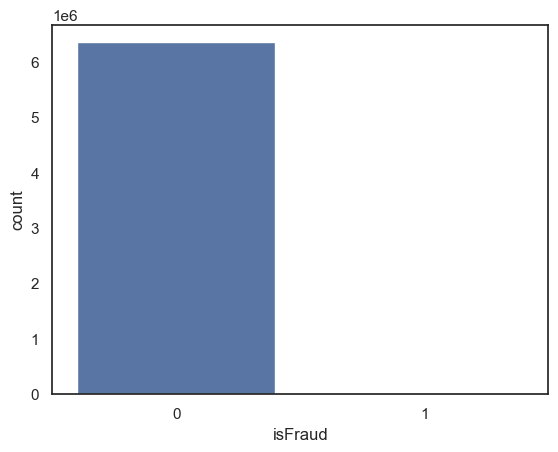

In [12]:
sns.countplot(x ='isFraud', data = data)
 
plt.show()

In [13]:
data['isFraud'].value_counts()   ,          data['isFraud'].value_counts() / data.shape[0] * 100

(0    6354407
 1       8213
 Name: isFraud, dtype: int64,
 0    99.870918
 1     0.129082
 Name: isFraud, dtype: float64)

As we can see above there are far more non-fraud rows than there are fraud rows in the dataset. 

In [14]:
data[data['isFraud']==1].describe().T    #exploring fraudulent transactions

,count,mean,std,min,25%,50%,75%,max
step,8213.0,3.684139e+02,2.163887e+02,1.0,181.00,367.00,558.00,7.430000e+02
amount,8213.0,1.467967e+06,2.404253e+06,0.0,127091.33,441423.44,1517771.48,1.000000e+07
oldbalanceOrg,8213.0,1.649668e+06,3.547719e+06,0.0,125822.44,438983.45,1517771.48,5.958504e+07
newbalanceOrig,8213.0,1.923926e+05,1.965666e+06,0.0,0.00,0.00,0.00,4.958504e+07
oldbalanceDest,8213.0,5.442496e+05,3.336421e+06,0.0,0.00,0.00,147828.66,2.362305e+08
newbalanceDest,8213.0,1.279708e+06,3.908817e+06,0.0,0.00,4676.42,1058725.22,2.367265e+08
isFraud,8213.0,1.000000e+00,0.000000e+00,1.0,1.00,1.00,1.00,1.000000e+00
isFlaggedFraud,8213.0,1.948131e-03,4.409731e-02,0.0,0.00,0.00,0.00,1.000000e+00


In [15]:
data[data['isFraud']==0].describe().T    #exploring non-fraudulent transactions

,count,mean,std,min,25%,50%,75%,max
step,6354407.0,2.432357e+02,1.421402e+02,1.00,156.000,239.00,334.000,7.180000e+02
amount,6354407.0,1.781970e+05,5.962370e+05,0.01,13368.395,74684.72,208364.760,9.244552e+07
oldbalanceOrg,6354407.0,8.328287e+05,2.887144e+06,0.00,0.000,14069.00,106969.500,4.381886e+07
newbalanceOrig,6354407.0,8.559702e+05,2.924987e+06,0.00,0.000,0.00,144730.740,4.368662e+07
oldbalanceDest,6354407.0,1.101421e+06,3.399202e+06,0.00,0.000,133311.80,944144.580,3.560159e+08
newbalanceDest,6354407.0,1.224926e+06,3.673816e+06,0.00,0.000,214881.70,1111975.345,3.561793e+08
isFraud,6354407.0,0.000000e+00,0.000000e+00,0.00,0.000,0.00,0.000,0.000000e+00
isFlaggedFraud,6354407.0,0.000000e+00,0.000000e+00,0.00,0.000,0.00,0.000,0.000000e+00


## From the two tables above we can see that fraudulent transactions tend to:

* happen at later hours

* involve higher amounts than non-fraudulent transactions

* have higher old balance amounts for origin account

* have lower new balance amounts for origin account

* have lower old balance amounts for destination account

* there is not as much difference between fraudulent and non-fraudulent transactions in terms of the new balance of the destination account 

## Now let´s see the above conclusions in graphs

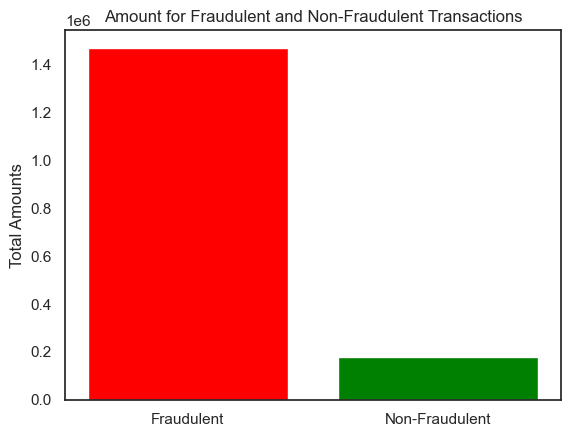

In [17]:
fraudulent_data = data[data['isFraud'] == 1]
non_fraudulent_data = data[data['isFraud'] == 0]

total_amount_fraudulent = fraudulent_data['amount'].mean()
total_amount_non_fraudulent = non_fraudulent_data['amount'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_amount_fraudulent, total_amount_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('Amount for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Total Amounts')
plt.show()

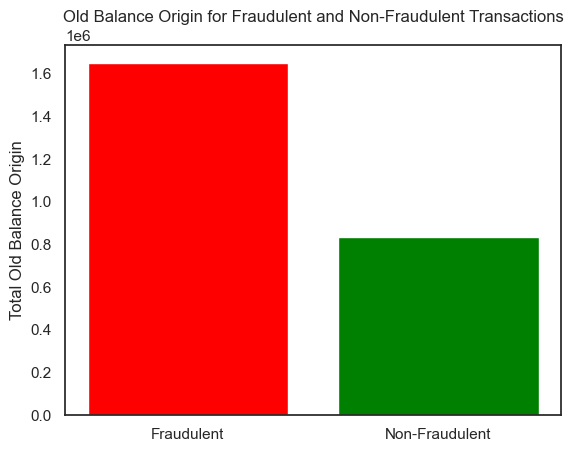

In [18]:
fraudulent_data = data[data['isFraud'] == 1]
non_fraudulent_data = data[data['isFraud'] == 0]

total_amount_fraudulent = fraudulent_data['oldbalanceOrg'].mean()
total_amount_non_fraudulent = non_fraudulent_data['oldbalanceOrg'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_amount_fraudulent, total_amount_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('Old Balance Origin for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Total Old Balance Origin')
plt.show()

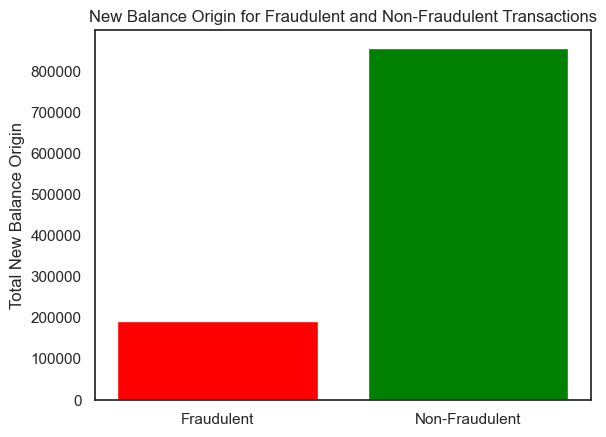

In [19]:
fraudulent_data = data[data['isFraud'] == 1]
non_fraudulent_data = data[data['isFraud'] == 0]

total_amount_fraudulent = fraudulent_data['newbalanceOrig'].mean()
total_amount_non_fraudulent = non_fraudulent_data['newbalanceOrig'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_amount_fraudulent, total_amount_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('New Balance Origin for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Total New Balance Origin')
plt.show()

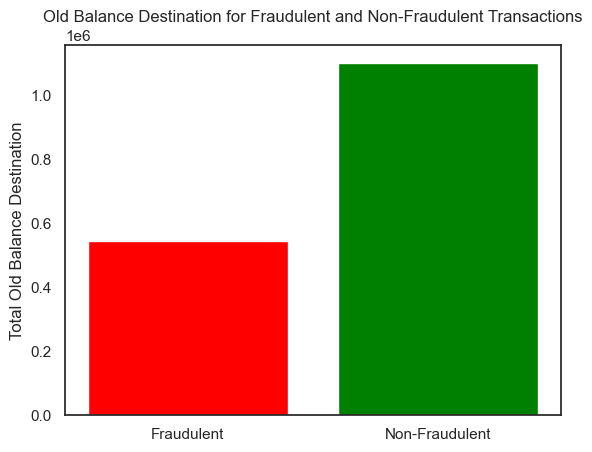

In [20]:
fraudulent_data = data[data['isFraud'] == 1]
non_fraudulent_data = data[data['isFraud'] == 0]

total_amount_fraudulent = fraudulent_data['oldbalanceDest'].mean()
total_amount_non_fraudulent = non_fraudulent_data['oldbalanceDest'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_amount_fraudulent, total_amount_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('Old Balance Destination for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Total Old Balance Destination')
plt.show()

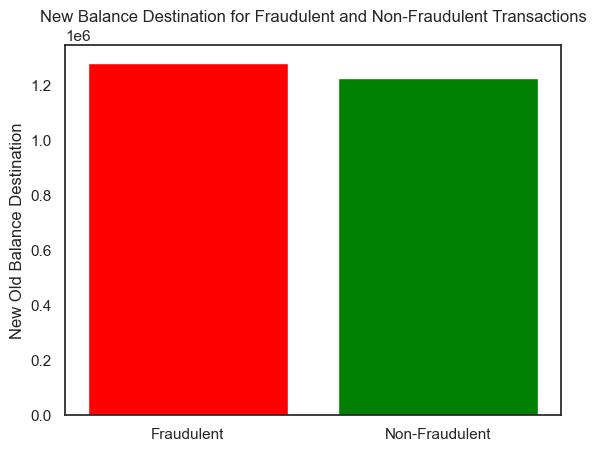

In [21]:
fraudulent_data = data[data['isFraud'] == 1]
non_fraudulent_data = data[data['isFraud'] == 0]

total_amount_fraudulent = fraudulent_data['newbalanceDest'].mean()
total_amount_non_fraudulent = non_fraudulent_data['newbalanceDest'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_amount_fraudulent, total_amount_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('New Balance Destination for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('New Old Balance Destination')
plt.show()

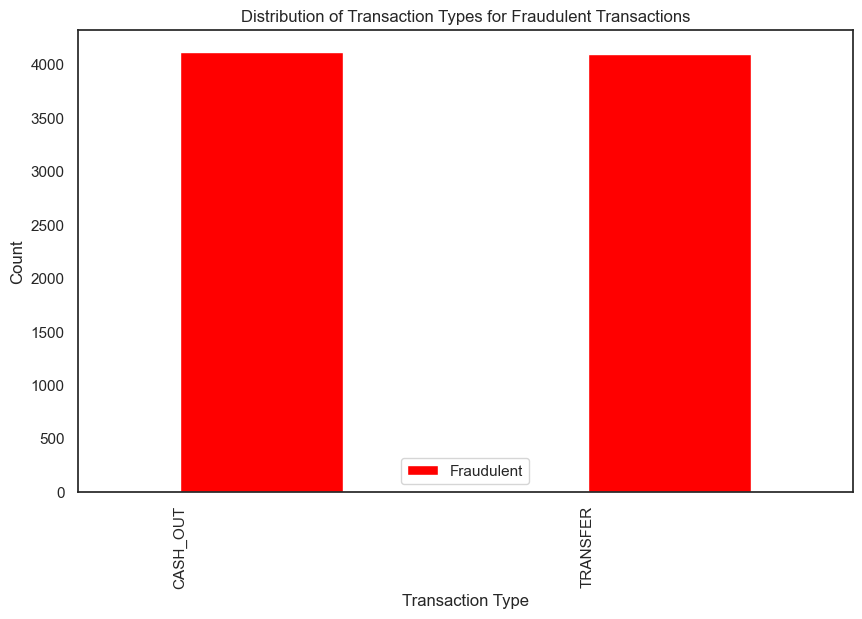

In [23]:
#I want to see the types of transactions for fraudulent transactions
fraudulent_transactions = data[data['isFraud'] == 1] 

fraudulent_type_counts = fraudulent_transactions['type'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

fraudulent_type_counts.plot(kind='bar', color='red', position=0, width=0.4, label='Fraudulent')

ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Transaction Types for Fraudulent Transactions')
ax.legend()

plt.show()


As we can see above, from the 5 types of transactions (Cash out, Payment, Cash in, Transfer and debit) we have in the dataset, fraudulent transactions only seem to be either Cash out or Transfers. There as many Cash outs as there are transfers in fraudulent transactions

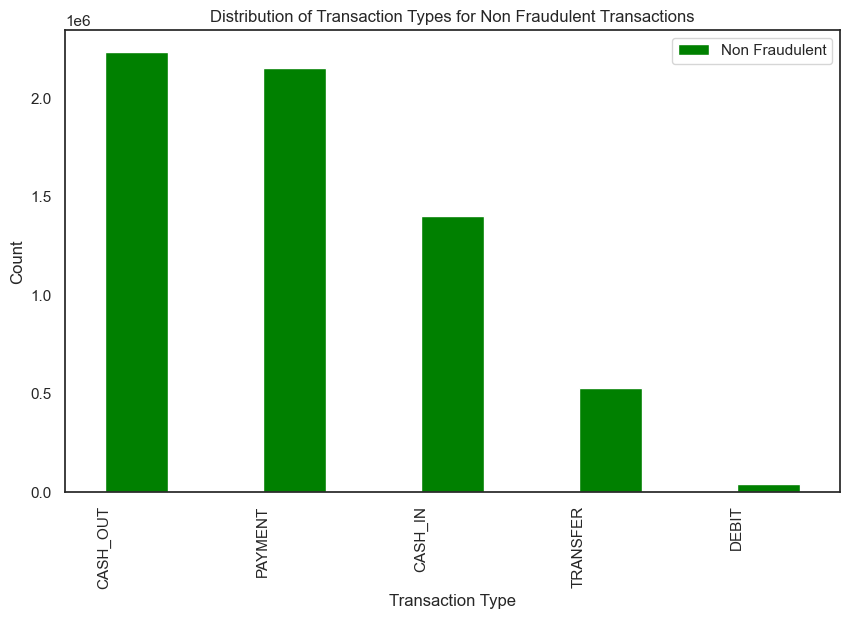

In [27]:
#I want to see the types of transactions for non fraudulent transactions
non_fraudulent_transactions = data[data['isFraud'] == 0] 

non_fraudulent_type_counts = non_fraudulent_transactions['type'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

non_fraudulent_type_counts.plot(kind='bar', color='green', position=0, width=0.4, label='Non Fraudulent')

ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Transaction Types for Non Fraudulent Transactions')
ax.legend()

plt.show()


From the above bar chart what we can see is that for non-fraudulent transactions the most popular type is Cash out, followed by Payment, Cash in , Transfer and lastly Debit

In [31]:
# I want to check which client commits fraud the most
data['nameOrig'][data['isFraud']==1].value_counts().sort_values(ascending=False)

C1305486145    1
C2032147559    1
C1420196421    1
C2101527076    1
C137533655     1
              ..
C1162922333    1
C1685995037    1
C43545501      1
C1446317541    1
C1280323807    1
Name: nameOrig, Length: 8213, dtype: int64

From what we can see above, fraudsters only commit one fraud transaction per client ID. 

In [33]:
#I want to see whether there is a popular Destination where fraud transactions are going to
data['nameDest'][data['isFraud']==1].value_counts().sort_values(ascending=False)

C1193568854    2
C1399829166    2
C1980653895    2
C1460854172    2
C964377943     2
              ..
C846260566     1
C1744173808    1
C797688696     1
C1812552860    1
C873221189     1
Name: nameDest, Length: 8169, dtype: int64

As per the above, there are quite a few destination IDs that are repeated twice, but that is as far as fraudsters will go. 